<a href="https://colab.research.google.com/github/catherinebirney/tiem-training/blob/main/flowsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FLOWSA Overview

FLOWSA is a Python package designed to streamline attributing environmental, economic, emission, waste, material, and other data to industry and end-use sectors.
- Pulls data from publicly available sources - variety of terminology and units
- Attributes data to standardized units and classification, generally NAICS
- Data attributed to production and/or consumption sectors
- A single row in an output dataset captures the generation of, the consumption of, or the direct flow of environmental/economic data between two sectors
- For example, we can capture water withdrawals consumed by wheat farming (SectorConsumedBy) or the movement of water from public supply withdrawals (SectorProducedBy) to domestic use (SectorConsumedBy)

### Links
1. GitHub repo: https://github.com/USEPA/flowsa

1. User guide (in progress): https://github.com/USEPA/flowsa/blob/master/docs/user_guide/user_guide.md

1. Wiki: https://github.com/USEPA/flowsa/wiki

1. EPA Data Commons (data storage): https://dmap-data-commons-ord.s3.amazonaws.com/index.html?prefix=flowsa/#flowsa/

1. Manuscript: https://www.mdpi.com/2076-3417/12/11/5742

# Clone FLOWSA GitHub repository

In [ ]:
# Clone the repository from GitHub into the local colab environment
!git clone https://github.com/USEPA/flowsa.git

In [ ]:
# Change directory
%cd flowsa
# Check out the colab branch - modified package requirements for google colab
!git checkout colab
# Install an editable version of cloned repo to access root files
!pip install -e .


# Flow-By-Activity Data

Flow-By-Activity (FBA) datasets are environmental and other data imported from government, peer-reviewed, or proprietary sources and formatted into [standardized tables](https://github.com/USEPA/flowsa/blob/master/format%20specs/FlowByActivity.md).
- Data largely unchanged from original data source, except for formatting
- FBA datasets retain original source terminology and units
- Defining columns for an FBA dataset are "ActivityProducedBy" and "ActivityConsumedBy" columns - contain the "activity" that produces or consumes the environmental/economic data

Import FLOWSA and print out the available FBA models.

In [ ]:
import flowsa
# see all data sources and years available in flowsa
flowsa.seeAvailableFlowByModels('FBA')

# FBA data access
We store data on [EPA's Data Commons](https://dmap-data-commons-ord.s3.amazonaws.com/index.html?prefix=flowsa/#flowsa/FlowByActivity/).

Version control:
- flowsa package version
- git hash

### Demonstration data
Data used in this demonstration are also available as csv files in the [GitHub repo](https://github.com/catherinebirney/tiem-training/tree/main/Data/flowsa).

# Access an FBA model
Download from data commons.

In [ ]:
from flowsa import getFlowByActivity, seeAvailableFlowByModels
from flowsa.settings import fbaoutputpath
# Load the wasted food report data, by downloading from data commons.
fba = getFlowByActivity(datasource="EPA_WFR", year=2018, download_FBA_if_missing=True)
fba

# Subset and explore FBA

In [ ]:
# List df columns
fba.columns

In [ ]:
# Define columns to subset
subset_cols = ['FlowName', 'FlowAmount', 'Unit', 'ActivityProducedBy', 'ActivityConsumedBy']
fba_sub = fba[subset_cols]
fba_sub

In [ ]:
# Subset to food waste generated by food manufacturing
fba_fm = fba_sub.query("ActivityProducedBy == 'Manufacturing/Processing'")
fba_fm

# How did we create the FBA?

1. Determine where the data is accessed, for example the Wasted Food Report is pulled from a PDF on the EPA website while EIA data is pulled from an API.
2. Create a YAML method file in the [methods/flowbyactivitymethods](https://github.com/USEPA/flowsa/tree/master/flowsa/methods/flowbyactivitymethods) directory, following the recommended [naming schema](#naming-schemas) and the steps for generating an [FBA yaml](#detailed-steps-to-writing-an-fba-method-yaml).
  - [EPA_WFR.yaml](https://github.com/USEPA/flowsa/blob/master/flowsa/methods/flowbyactivitymethods/EPA_WFR.yaml) includes the link to the data PDF.
  - Other methods, such as [EIA_MECS_Energy.yaml](https://github.com/USEPA/flowsa/blob/master/flowsa/methods/flowbyactivitymethods/EIA_MECS_Energy.yaml) direct flowsa to pull data through an API.
3. Create source-specific functions in a data source .py file, hosted in the [data_source_scripts](https://github.com/USEPA/flowsa/tree/master/flowsa/data_source_scripts) directory.
  - [EPA_WFR.py](https://github.com/USEPA/flowsa/blob/master/flowsa/data_source_scripts/EPA_WFR.py) contains directions for scraping PDF tables.
  - These files are required for each data source and must be tailored to the data.

# What if we want to know what *kinds* of food manufacturing generate waste?
We can use North American Industry Classification System (NAICS) codes as the types of manufacturing. We can look up [NAICS 311](https://www.census.gov/naics/?input=311&year=2017).


# Convert source data to sectors
- We have data formatted into standardized tables - uses original terminology
- We map the original source terminology to NAICS with a [crosswalk](https://github.com/USEPA/flowsa/tree/master/flowsa/data/activitytosectormapping) created for each data source
  - [NAICS_Crosswalk_EPA_WFR.csv](https://github.com/USEPA/flowsa/blob/master/flowsa/data/activitytosectormapping/NAICS_Crosswalk_EPA_WFR.csv)
  - Crosswalks are developed using data source definitions/mapping files when available and NAICS definitions
- We need to know the data well when creating the mapping file. We cannot map "Manufacturing/Processing" to all "311" NAICS because within the WFR, we separately have data on "Dog and cat food manufacturing" and "Animal feed"

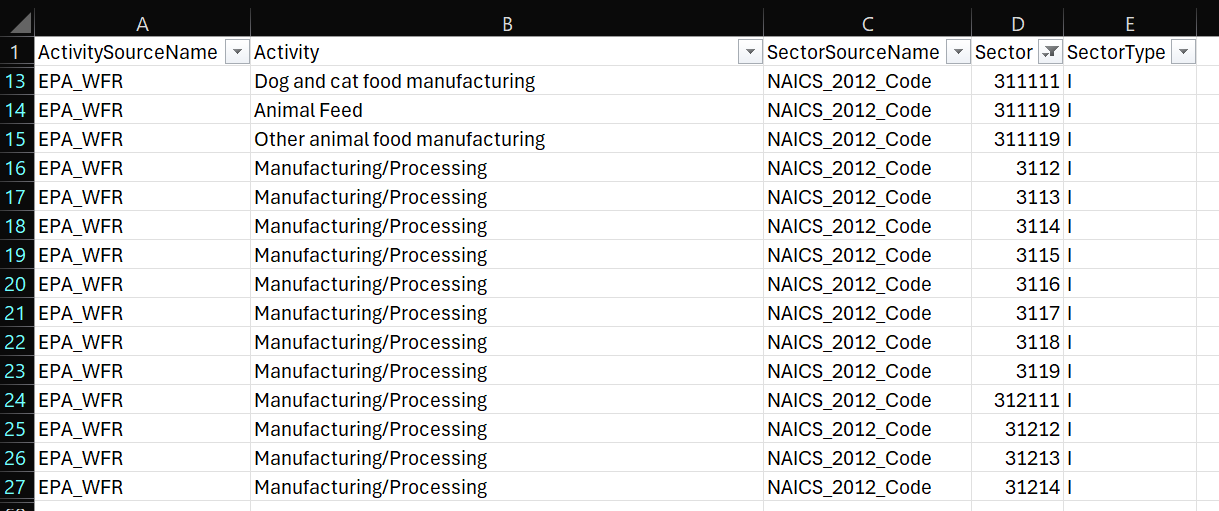

# Flow-By-Sector Datasets

Flow-By-Sector (FBS) datasets capture the direct resource generation or consumption by sectors, or the movement of data between sectors.
- FBS datasets are [standardized tables]((https://github.com/USEPA/flowsa/blob/master/format%20specs/FlowBySector.md)) generated by attributing FBA and/or other FBS data to sectors.
- FBS datasets can be created from a single FBA, multiple FBAs, or a combination of FBA and FBS datasets.
- The defining columns for an FBS are the "SectorProducedBy" and "SectorConsumedBy" columns - contain the _sector_ that produces or consumes the environmental/economic data.
- Unlike the FBA, thse data sets are _very_ flexible and adaptable to user needs

In [ ]:
# see available FBS models
seeAvailableFlowByModels('FBS')

In [ ]:
from flowsa import getFlowBySector
# Access the food waste flow by sector, download_FBS_if_missing downloads the FBS rather than generating the dataset
food_m1 = getFlowBySector('Food_Waste_national_2018_m1', download_FBS_if_missing=True)
food_m1

# Subset and explore FBS

In [ ]:
# List df columns
food_m1.columns

In [ ]:
# Subset to "Frozen Fruit, Juice, and Vegetable Manufacturing"
sub_cols = ['SectorProducedBy', 'SectorConsumedBy','Location',
            'FlowAmount', 'Unit', 'FlowType', 'Year', 'MetaSources',
            'AttributionSources']

food_m1_fm = (food_m1[sub_cols]
              .query("SectorProducedBy.str.startswith('311411')"))
food_m1_fm

# How did we create the FBS?
1. Create a Flow-By-Sector method yaml within the [methods/flowbysectormethods](https://github.com/USEPA/flowsa/tree/master/flowsa/methods/flowbysectormethods) directory
  - [Food_Waste_m1_2018.yaml](https://github.com/USEPA/flowsa/blob/master/flowsa/methods/flowbysectormethods/Food_Waste_national_2018_m1.yaml)
1. Identify targets for the FBS output
   - Target sector level for the FBS
   - Sector year (e.g, NAICS_2012_Code)
   - Geographic scale
1. Identify the primary FBA or FBS datasets required to generate an FBS
1. Mapping to standardized elementary flow list [fedelemflowlist](https://github.com/USEPA/fedelemflowlist) (supports Federal LCA Commons)
1. Subset the primary data sources to only include the necessary data for the FBS method
1. Break the primary FBA/FBS datasets into "activity sets", grouped by _how_ the data will be attributed to sectors. Data within an FBA often requires multiple types of attribution. We can attribute data within a single FBS using different attribution methods, attribution sources.
   - Optionally, can create an activity set csv file within [flowbysectoractivitysets](https://github.com/USEPA/flowsa/tree/master/flowsa/methods/flowbysectoractivitysets). These activity sets are generally created with method-specific scripts stored in [scripts/FlowBySector_Activity_Sets](https://github.com/USEPA/flowsa/tree/master/scripts/FlowBySector_Activity_Sets).
   - Attribution methods:

    - direct: Activities are directly assigned to sectors using the source to NAICS crosswalk
    -multiplication: Multiply the values in the primary source with values sharing the same sectors in the attribution source
    -proportional: Activities are proportionally attributed to sectors using specified attribution data source
    -equal: Equally attribute parent values to child values until reach target sector length
    -inheritance: Assign parent values to all child values. Usefull in situations where value is a rate, such as kg/m2.

1. Identify additional FBA/FBS datasets required to attribute each "activity set" of the primary FBA to target sectors

# What if we want to explore other food waste data sources and create an alternative model?
Once the source data are imported and formatted in flowsa as FBA, it can be straight forward to test alternative FBS methods.

[Food_Waste_national_2018_m2](https://github.com/USEPA/flowsa/blob/master/flowsa/methods/flowbysectormethods/Food_Waste_national_2018_m2.yaml)

# Explore food waste FBS m2

In [ ]:
# Testing an alternative method of generating a food waste FBS
food_m2 = getFlowBySector('Food_Waste_national_2018_m2', download_FBS_if_missing=True)
food_m2